# 2025 Project : Spotify Most Streamed Songs

<div style="border: 2px solid;
    border-image: linear-gradient(45deg, black, gray, black) 1;
    padding: 10px;
    animation: borderAnimation 3s infinite linear;"> 

## Project objective:
*The objective of the study is to use data on the most popular tracks on Spotify to analyze the factors that influence their popularity, identify the most popular genres, artists and characteristics of the tracks, and visualize key trends using data analysis tools (pandas, matplotlib, seaborn)*
</div>

<style>
@keyframes borderAnimation {
    0% { border-image-source: linear-gradient(45deg, red, purple, blue); }
    50% { border-image-source: linear-gradient(45deg, blue, green, yellow); }
    100% { border-image-source: linear-gradient(45deg, red, purple, blue); }
}
</style>



<div style="border: 1px solid black; padding: 10px;"> 
    
# Plan:
**1. Loading and initial research of data** 
- Libraries import
- Data load
- View general information about data, dropping unnecessary data
  
**2. Data preprocessing**
- Checking and handling missing values to avoid errors in analysis.
- Data Type casting
- Checking and removing duplicates

**3. Exploratory data analysis**
- Finding the general number of songs with multiple artists
- List of most popular artists by number of tracks
- Finding the most popular/unpopular songs in dataset
- Checking the songs that never been in spotify charts
- Comparing spotify and apple charts
- Filtering deezer playlists with songs that were in playlists less than 10 times
- Finding the songs that actually were in deezer charts
- Analysis Shazam charts column
- Key column N/A filtering
- Identifying outliers in BPM to see if there are extreme values outside the allowed BPM(65-206)
  
**4. Visualization of songs by number of spotify playlists , apple playlists , also visualization song distribution by beats per minute and bar charts for number of songs per artist** 

**5. Conclusion and recommendations for dataset**

- Identify key factors in song popularity
- Determine which artists are dominant in dataset
- Provide recommendations for musicians/producers
  </div>


# Data description
<div style="border: 1px solid black; padding: 10px;"> 
    
**_Dataset -2025_SpotifyMostStreamedSongs-:_**
- `track_name` : Name of the song in each row
- `artist(s)_name` : The name of the artist who performed the song (not necessarily just one)
- `artist_count`: Number of artists who performed a song
- `in_spotify_playlists`: Column that shows how many Spotify playlists a song has been added to
- `in_spotify_charts`: Column which shows how many times song was in Spotify charts
- `streams`: A column that shows how many times a song has been listened to
- `in_apple_playlists`: Column that shows how many Apple playlists a song has been added to
- `in_apple_charts`: Column which shows how many times song was in Apple charts
- `in_deezer_playlists`: Column that shows how many Deezer playlists a song has been added to
- `in_deezer_charts`: Column which shows how many times song was in Deezer charts
- `in_shazam_charts`: Column which shows how many times song was in Shazam charts
- `bpm`: A column that displays how many beats per minute a song contains
- `key`: The column that is responsible for the tonality of the track

</div>

In [2]:
#Libraries import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("data.csv")


In [4]:
#Removing unnecessary columns
df = df.drop(['mode' , 'danceability_%' , 'cover_url' , 'valence_%' , 'energy_%' , 'acousticness_%' , 'instrumentalness_%' ,  'liveness_%' , 'speechiness_%' , 'released_year' ,  'released_month' , 'released_day'] , axis = 1)


In [5]:
df.head(10) #Output first 10 lines

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A
5,Sprinter,"Dave, Central Cee",2,2186,91,183706234,67,213,88,17,946,141,C#
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,725980112,34,222,43,13,418,148,F
7,Columbia,Quevedo,1,714,43,58149378,25,89,30,13,194,100,F
8,fukumean,Gunna,1,1096,83,95217315,60,210,48,11,953,130,C#
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,553634067,49,110,66,13,339,170,D


In [6]:
df.info() #General dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   in_spotify_playlists  953 non-null    int64 
 4   in_spotify_charts     953 non-null    int64 
 5   streams               953 non-null    object
 6   in_apple_playlists    953 non-null    int64 
 7   in_apple_charts       953 non-null    int64 
 8   in_deezer_playlists   953 non-null    object
 9   in_deezer_charts      953 non-null    int64 
 10  in_shazam_charts      903 non-null    object
 11  bpm                   953 non-null    int64 
 12  key                   858 non-null    object
dtypes: int64(7), object(6)
memory usage: 96.9+ KB


# Analyze data types for each column
- Column 'track_name'(dtype object): There won't be any errors here, but I can check for duplicate values to make sure each **track_name** is unique
  
- Column 'artist(s)_name'(dtype object): Also to check whether the same artists appear multiple times in the dataset and identify the most popular artists
  
- Column 'artist_count'(dtype int): Check if there are songs with multiple artists and determine how often this happens
  
- Column 'in_spotify_playlists'(dtype int): Evaluate the distribution of songs by the number of playlists. There may be a sharp gap between popular and less popular tracks
  
- Column 'in_spotify_charts'(dtype int): Check if there are any tracks that did not chart at all (value = 0)
  
- Column 'streams'(dtype object): First of all we need to convert **streams** to an float value, because errors may occur while filtering data, if there are missing (NaN) values in the data, they can be handled by filling them with the mean or by deleting the corresponding rows
 
- Column 'in_apple_playlists' (dtype int): Similar to Spotify, you can plot the distribution of the number of playlists
 
- Column 'in_apple_charts' (dtype int): Compare the number of songs that hit the Apple and Spotify charts and spot the differences
  
- Column 'in_deezer_playlists' (dtype object): Strange data type (should be int, but object is listed). Again, the column needs to be converted to int values.
  
- Column 'in_deezer_charts' (dtype int): Similar to Apple and Spotify, you can see how many songs are in Deezer charts
  
- Column 'in_shazam_charts' (dtype object): Similar situation with the data type. Need to be converted to int and check if there are tracks popular only in Shazam
  
- Column 'bpm' (dtype int): Can plot a histogram by using sea to see the distribution of song tempos. This can show which tempos are most popular.
  
- Column 'key' (dtype object): 858 non-empty values, so 95 rows have gaps. Need to decide how to deal with them (fill with the most frequent value or delete rows). Also analyze which tonality are used most often
  

In [7]:
df['streams'] = pd.to_numeric(df['streams'] , errors = 'coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'] , errors = 'coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'] , errors = 'coerce')

In [8]:
df.describe()

,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm
count,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,953.000000,896.000000,953.000000
mean,1.556139,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,2.666317,51.176339,122.540399
std,0.893044,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,6.035599,126.487856,28.057802
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,1.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,0.000000,0.000000,100.000000
50%,1.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,0.000000,2.000000,121.000000
75%,2.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000


# Column Analysis Based on Descriptive Statistics
### 1. Column : 'Artist_count'
- Number of artists in the song. If there is a zero value in the column (they don't exist), this may be an error, so needed to be checked.
### 2. Column: 'In_spotify_playlists'
- The average number of tracks in Spotify playlists is 5k but the minimum is 31 which may be an anomaly and such playlists should be checked as it may be a mistake.
### 3. Column: 'In_spotify_charts'
- There are tracks that have never been in the charts, the average value is 12 (on average, a track has been in the charts 12 times), the maximum is 147. Need to check which tracks have never appeared in the charts, as well as the track(-s) that have been in the charts the most times.
### 4. Column: 'Streams'
- The minimum value of song listening is 2762, the average is 500+ million, which indicates that the dataset mainly contains popular songs, the maximum value is 3.7 billion. You can find the most listened to track from the dataset, the least listened to, and also check the column for empty values.
### 5. Column 'In_apple_playlists' 
- Check for empty values. Also check if there are songs in the tops of Spotify, but are absent in Apple
### 6. Column 'In_apple_charts'
- Check out which tracks have never made it into the Apple charts
### 7. Column 'In_deezer_playlists'
- It is advisable to check for empty values and replace with 0 (never been in playlists). Also check which songs were less than 10 times in Deezer playlists.
### 8. Column 'In_deezer_charts'
- Most of the songs didn't make it into the Deezer charts. Check which of the majority of songs did make it into the charts.
### 9. Column 'In_shazam_charts'
- Check for empty values (NaN). These values may mean that there is no information about the song's hits in the Shazam chart. If there are many such values, you can consider whether they need to be filled in (for example, replaced with 0) or left as is.
### 10. Column 'bpm'
- As always, check for empty values, as well as for values that are zero. BPM in this dataset is in the range from 65 to 206, find songs that are out of range, and delete rows.
  

In [9]:
(df.isnull().sum()) #Checking for missing values

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
dtype: int64

## N/A values analysis:
### 'Streams' column(1 missing values): 
- #### This column is missing values in 1 case, which may indicate that there is no information about the number of plays for one song.
- #### This needs to be investigated: I think it is better to delete the row so that there are no problems with it in the future.
### 'In_deezer_playlists' column(79 missing values):
- #### This means that there are 79 songs that have no information about Deezer playlists.
- #### I would replace the missing values with 0, which would mean that there were 0 playlists for 79 songs
### 'In_shazam_charts' column(57 missing values):
- #### 57 songs have no information about their inclusion in Shazam charts
- #### I think that, just like in deezer_playlists, it is better to replace the missing values with 0, which will indicate that the songs have never appeared in the charts
### 'key' column (95 missing values):
- #### 97 songs have missing key data
- #### I would replace all missing values in a column with the most recurring sentiment in the column (mode)

In [10]:
#Deleting missing values in streams
df = df.dropna(subset=['streams'])
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
dtype: int64


In [11]:
print(df['track_name'].duplicated().sum())  #Cheking for duplicates in track name column
df = df.drop_duplicates(subset='track_name')

10


In [12]:
#Replace missing values in Deezer and Apple charts with Zeros
df['in_deezer_playlists'].fillna(0, inplace=True)
df['in_shazam_charts'].fillna(0, inplace=True)
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     92
dtype: int64


C:\Users\lelik\AppData\Local\Temp\ipykernel_20716\2773274332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_deezer_playlists'].fillna(0, inplace=True)
C:\Users\lelik\AppData\Local\Temp\ipykernel_20716\2773274332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [13]:
print(df.duplicated(subset=['track_name', 'artist(s)_name']).sum()) #Checking whether the same artists and same song appear multiple times in the dataset

0


In [31]:
#Output of the 10 most frequent artists in dataset
artists_count = df['artist(s)_name'].value_counts().head(10)
artists_count



artist(s)_name
Taylor Swift        34
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        16
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Drake, 21 Savage     8
Feid                 8
Name: count, dtype: int64

In [15]:
#Count songs with multiple artists
songs_with_multiple_artists = df[df['artist_count'] > 1]
num_of_songs_with_multiple_artists = songs_with_multiple_artists.shape[0]
print(num_of_songs_with_multiple_artists)

364


In [16]:
#Finding the most popular/unpopular song-s in dataset
popular_song = df.loc[df['streams'].idxmax(), ['track_name' , 'streams']]
unpopular_song = df.loc[df['streams'].idxmin(), ['track_name' ,'streams']]
print("The most popular song:\n" , popular_song)
print("The most unpopular song:\n" , unpopular_song)


The most popular song:
 track_name    Blinding Lights
streams          3703895074.0
Name: 55, dtype: object
The most unpopular song:
 track_name    Que Vuelvas
streams            2762.0
Name: 123, dtype: object


In [17]:
#Output of the 10  most popular songs in dataset
df.sort_values(by='streams' , ascending = False).head(10)[['track_name' ,'streams']]

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,One Dance,2.713922e+09
84,STAY (with Justin Bieber),2.665344e+09
140,Believer,2.594040e+09
725,Closer,2.591224e+09
48,Starboy,2.565530e+09


In [18]:
#Checking for songs that never been in spotify charts
df[df['in_spotify_charts'] == 0][['artist(s)_name' , 'track_name' , 'streams' , 'in_spotify_charts']].sort_values(by='streams' , ascending=False)

,artist(s)_name,track_name,streams,in_spotify_charts
620,Tones and I,Dance Monkey,2.864792e+09,0
725,"The Chainsmokers, Halsey",Closer,2.591224e+09,0
407,Dua Lipa,Don't Start Now,2.303034e+09,0
621,Juice WRLD,Lucid Dreams,2.288695e+09,0
685,Ed Sheeran,Thinking Out Loud,2.280566e+09,0
...,...,...,...,...
809,"Kendrick Lamar, Beth Gibbons",Mother I Sober (feat. Beth Gibbons of Portishead),3.338145e+07,0
238,"WizKid, Toian, Metro Boomin, Don Toliver, Beam","Link Up (Metro Boomin & Don Toliver, Wizkid fe...",3.276169e+07,0
379,Morgan Wallen,Devil Donï¿½ï¿½ï¿½,3.252695e+07,0
577,The Weeknd,Phantom Regret by Jim,3.195957e+07,0


In [19]:
#Comparing the number of songs that hit spotify and apple charts
spotify_songs = set(df['in_spotify_charts'])
apple_songs = set(df['in_apple_charts'])
common_songs = spotify_songs.intersection(apple_songs) #Finding a songs which appears in both sets 
songs_in_spotify_charts = df['in_spotify_charts'].nunique()
songs_in_apple_charts = df['in_apple_charts'].nunique()
print("Number of songs in Spotify charts:" , songs_in_spotify_charts - len(common_songs)) #Finding unique songs which appears only in Spotify charts
print("Number of songs in Apple charts:" , songs_in_apple_charts - len(common_songs)) #Finding unique songs which appears only in Apple charts


Number of songs in Spotify charts: 3
Number of songs in Apple charts: 93


In [20]:
#Checking what songs were in deezer playlists less than 10 times
df[df['in_deezer_playlists'] < 10][['artist(s)_name' , 'track_name' , 'streams' , 'in_deezer_playlists']].sort_values(by='in_deezer_playlists' , ascending=False)

,artist(s)_name,track_name,streams,in_deezer_playlists
203,"Natanael Cano, Gabito Ballesteros, Peso Pluma",AMG,4.635650e+08,9.0
256,"Nile Rodgers, LE SSERAFIM",UNFORGIVEN (feat. Nile Rodgers),9.203512e+07,9.0
374,Fujii Kaze,ýýýýýýýýýýýýýýýýýýýýý,4.030974e+08,9.0
345,ThxSoMch,SPIT IN MY FACE!,3.032163e+08,9.0
781,Bad Bunny,Un Coco,4.032316e+08,9.0
...,...,...,...,...
627,"Tini, L-Gante",Bar,2.009727e+08,0.0
624,Nirvana,Smells Like Teen Spirit - Remastered 2021,1.690193e+09,0.0
623,John Legend,All of Me,2.086124e+09,0.0
620,Tones and I,Dance Monkey,2.864792e+09,0.0


In [21]:
#Checking which songs actually made it into the charts
df[df['in_deezer_charts'] > 0][['artist(s)_name' , 'track_name' , 'streams' , 'in_deezer_charts']].sort_values(by='in_deezer_charts' , ascending=False)

,artist(s)_name,track_name,streams,in_deezer_charts
12,Miley Cyrus,Flowers,1.316856e+09,58
14,Harry Styles,As It Was,2.513188e+09,46
42,"Bebe Rexha, David Guetta",I'm Good (Blue),1.109433e+09,45
29,Dua Lipa,Dance The Night (From Barbie The Album),1.274090e+08,38
26,"Rï¿½ï¿½ma, Selena G",Calm Down (with Selena Gomez),8.991834e+08,38
...,...,...,...,...
43,"Tyler, The Creator, Kali Uchis",See You Again,1.047101e+09,1
45,Miley Cyrus,Angels Like You,5.705151e+08,1
48,"The Weeknd, Daft Punk",Starboy,2.565530e+09,1
250,Eminem,The Real Slim Shady,1.424590e+09,1


In [22]:
#Searching for songs which are popular only in Shazam charts
popular_shazam_songs = df[(df['in_deezer_charts'] == 0) & (df['in_spotify_charts'] == 0) & (df['in_shazam_charts'] > 0)]
popular_shazam_songs[['artist(s)_name' , 'track_name' , 'streams' , 'in_shazam_charts']].sort_values(by='streams' , ascending=False)

,artist(s)_name,track_name,streams,in_shazam_charts
725,"The Chainsmokers, Halsey",Closer,2.591224e+09,44.0
621,Juice WRLD,Lucid Dreams,2.288695e+09,5.0
685,Ed Sheeran,Thinking Out Loud,2.280566e+09,28.0
516,"SZA, Doja Cat",Kiss Me More (feat. SZA),1.575467e+09,12.0
599,Ariana Grande,positions,1.252564e+09,2.0
...,...,...,...,...
312,Melanie Martinez,VOID,6.707041e+07,52.0
815,Chanel,SloMo,6.571993e+07,2.0
236,"Kendrick Lamar, Beyoncï¿",AMERICA HAS A PROBLEM (feat. Kendrick Lamar),5.708907e+07,1.0
305,NF,HAPPY,5.272300e+07,78.0


In [23]:
#Finding most common key in key column
most_common_key = df['key'].mode()[0]
df['key'].fillna(most_common_key , inplace=True) #Filling missing values with most common key
print(df['key'].isnull().sum()) #Double check missing values update
df['key'].value_counts() #Finding the most frequent tonality

0


C:\Users\lelik\AppData\Local\Temp\ipykernel_20716\1226832001.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(most_common_key , inplace=True) #Filling missing values with most common key


key
C#    211
G      96
F      89
G#     89
B      81
D      80
A      73
F#     73
E      62
A#     56
D#     32
Name: count, dtype: int64

In [24]:
#Finding the songs which are not satisfy our bpm criteria
bpm_filtered = df[(df['bpm'] < 65) | (df['bpm'] > 206)]
print(bpm_filtered)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key]
Index: []


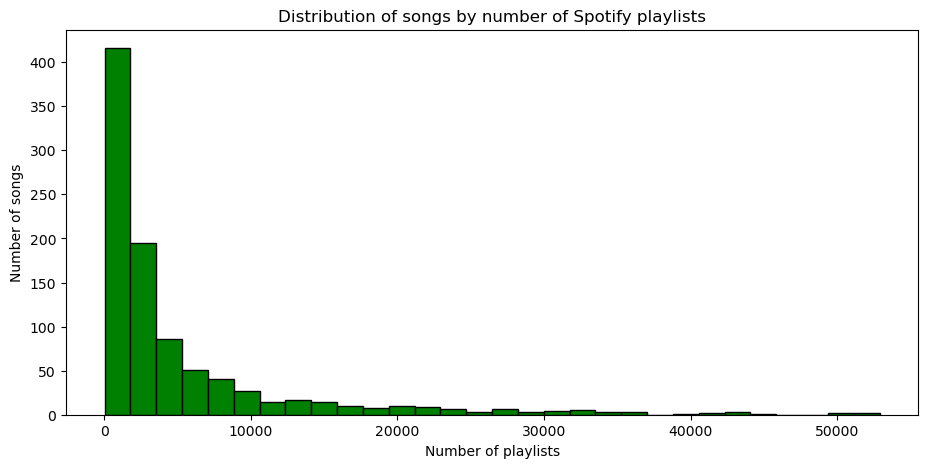

In [25]:
#Analysis of the number of spotify playlists that contain songs
plt.figure(figsize=(11,5))
plt.hist(df['in_spotify_playlists'], bins=30, edgecolor='black' , color = 'green')
plt.xlabel('Number of playlists')
plt.ylabel('Number of songs')
plt.title('Distribution of songs by number of Spotify playlists')
plt.savefig("C:\\Users\\lelik\\Desktop\\vs\\AlexIrnazarovPet_projects\\2025_SpotifyMostStreamedSongs\\img\\songdistrubtionbyspotifyplaylists.png")
plt.show()           

<div style="border: 1px solid black; padding: 10px;"> 
    
## Histogram output:
- #### **1. Distribution bias** – most songs end up in a relatively small number of playlists, while a small portion of songs are present in a huge number of playlists.
- #### **2. Gap between popular and unpopular tracks** – there is a sharp difference between ordinary songs and hits that are added to tens of thousands of playlists.
- #### **3. Possible outliers** - a few songs appear in an extremely large number of playlists (e.g. over 50,000), which may indicate hits or marketing campaigns.
- #### **4. Log-normal distribution** - many songs with a small number of playlists and a few with a huge number
</div>


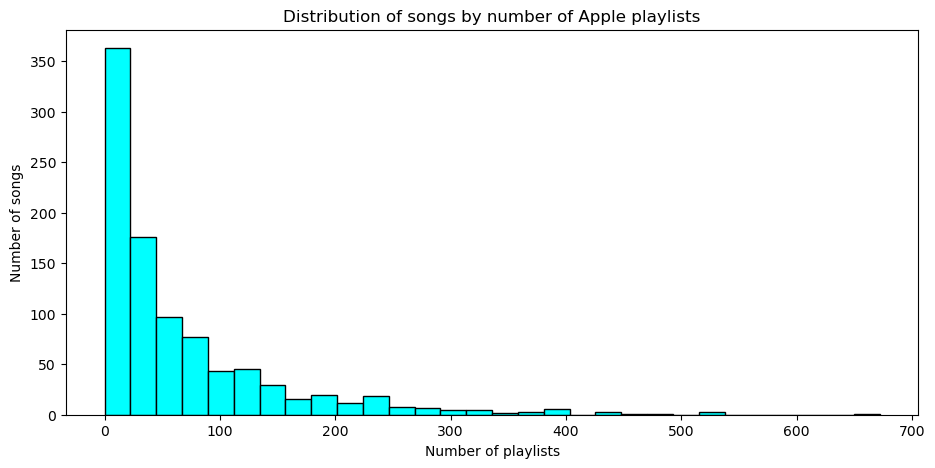

In [26]:
#Analysis of the number of apple playlists that contain songs
plt.figure(figsize=(11,5))
plt.hist(df['in_apple_playlists'], bins=30, edgecolor='black' , color='cyan')
plt.xlabel('Number of playlists')
plt.ylabel('Number of songs')
plt.title('Distribution of songs by number of Apple playlists')
plt.savefig("C:\\Users\\lelik\\Desktop\\vs\\AlexIrnazarovPet_projects\\2025_SpotifyMostStreamedSongs\\img\\songdistrubtionbyappleplaylists.png")
plt.show() 

<div style="border: 1px solid black; padding: 10px;"> 
    
## Histogram output:
- #### **1. Distribution bias** – most songs end up in a relatively small number of playlists, while a small portion of songs are present in a big number of playlists.
- #### **2. Gap between popular and unpopular tracks** –  gap between hits and other songs, but it is less pronounced than on Spotify.
- #### **3. Outliers** – Apple Music has few (maximum around 500-700), while Spotify has tracks with tens of thousands of playlists
- #### **4. Log-normal distribution**- many songs with a small number of playlists and a few with a huge number
</div>

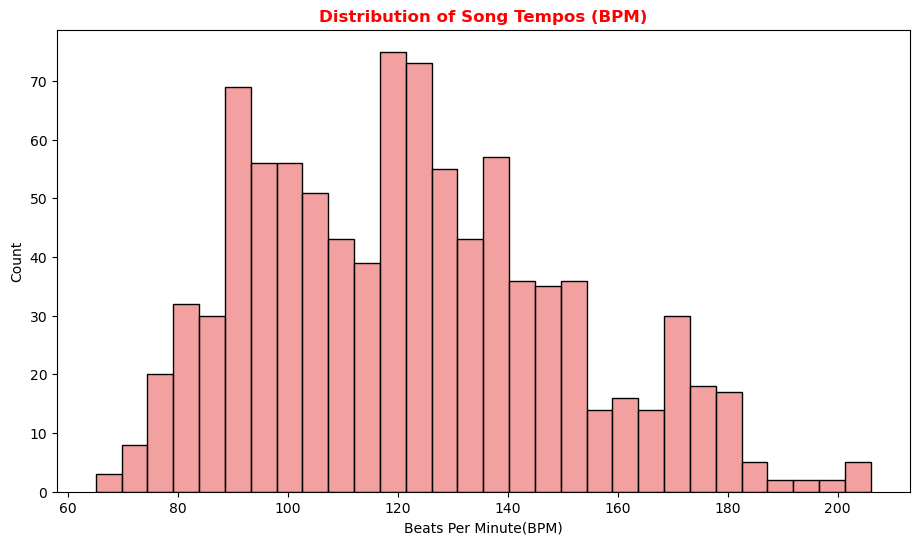

In [38]:
#Building a histogram for bpm distribution of song tempos
plt.figure(figsize = (11,6))
sns.histplot(df['bpm'] , bins=30 , color = 'lightcoral' , edgecolor='black')
plt.xlabel('Beats Per Minute(BPM)')
plt.ylabel('Count')
plt.title('Distribution of Song Tempos (BPM)' , fontweight = 'bold', color = 'red')
plt.savefig("C:\\Users\\lelik\\Desktop\\vs\\AlexIrnazarovPet_projects\\2025_SpotifyMostStreamedSongs\\img\\distributionofsongtempos.png")
plt.show() 

<div style="border: 1px solid black; padding: 10px;"> 
    
## Histogram output:
#### **Popular tempo ranges:**
- ##### The greatest number of songs are concentrated in the range of 90-130 BPM.
- ##### The peak is around 120 BPM, which coincides with the tempo of many popular songs (especially pop and electronic).
#### **Distribution tails:**
- ##### Fewer songs with very low tempos (less than 70 BPM).
- ##### Also a few tracks with very high tempos (more than 180 BPM), which is typical for extreme genres (drum and bass, hardcore)
#### **Two possible peaks:**
- ##### The main peak is around 120 BPM (dance music, pop, EDM).
- ##### The second small peak is around 90 BPM, which can be associated with hip-hop and rhythm and blues.
</div>


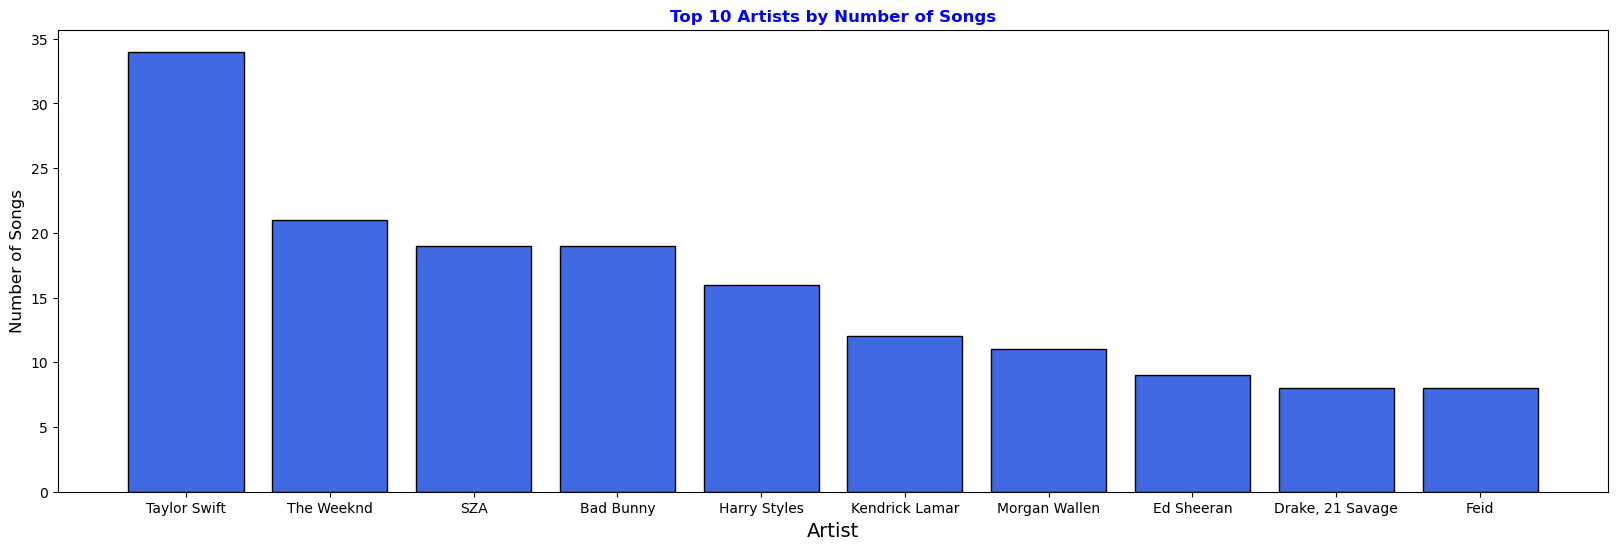

In [41]:
plt.figure(figsize=(20,6))
plt.bar(artists_count.index, artists_count.values, edgecolor='black' , color='royalblue')
plt.xlabel('Artist' , fontsize=14)
plt.ylabel('Number of Songs', fontsize =12)
plt.title('Top 10 Artists by Number of Songs',  fontweight='bold', color='blue')
plt.savefig("C:\\Users\\lelik\\Desktop\\vs\\AlexIrnazarovPet_projects\\2025_SpotifyMostStreamedSongs\\img\\top10artistsbynumberofsongs.png")
plt.show() 

<div style="border: 1px solid black; padding: 10px;"> 
    
## Bar chart output:
- #### The chart visually shows the number of songs for the top 10 most popular artists based on their presence on the list of the most streamed tracks of 2025.
- #### Taylor Swift leads the pack with the most songs, far outpacing all other artists.
- #### The Weeknd, SZA and Bad Bunny also make up the top 4, with roughly equal numbers of songs on the chart.
- #### Harry Styles и Kendrick Lamar follow them with slightly fewer tracks.
- #### The gaming artists - Morgan Wallen, Ed Sheeran, Drake x 21 Savage and Feid - round out the top ten, showing off similar results.
## This chart shows which artists are most likely to dominate streaming charts in 2025, which could indicate the continued success of their music careers.
</div>

<div style="border: 1px solid red; padding: 10px;"> 
    
# General conclusion
During the project, the task of data analysis was completed, with the aim of finding data on the most popular tracks on streaming platforms to analyze the factors influencing their popularity, identify the most popular artists and track characteristics, and visualize key trends using data analysis tools.

## Analysis results:
-   An analysis of Spotify's Most Streamed Songs dataset has revealed which artists dominate the streaming charts. The most popular artists have multiple hits, confirming their enduring influence on the platform.
-   The study also found that the number of times a track appears on Spotify and Apple Music playlists is directly related to its success. Some songs get millions of plays but don’t always make it to the charts, which could be due to marketing strategies or the specifics of the platforms algorithms.

## Recommendations:
- **For artists and labels – focus on promotion through playlists and other marketing tools.**
- **For platforms – analysis of factors influencing tracks getting into charts and possible improvement of recommendation algorithms.**
- **For further analysis, you can study the influence of specific playlists on the success of a track and compare the popularity of tracks in different countries**
</div>